### K-Nearest Neighbour

KNN is a supervised machine learning technique which is used for both classification and regression usecases. KNN predict the correct classes of the test data by calculating the distance between the two points or two vectors. Based on 'K' value it tries to check the who neighbour is nearer to the point and then select that those points and then predicts the new point is belong to that classes based on majority of the class. in case of classification problem it predicts the outcome with highest probability, where in the case of regression problem it derived by mean of all the nearest points.

<img src='1.png'>

<img src='2.png'>

It selects the nearest neighbors based on the __'K'__ value and then select the class by with majority of votes.

<img src='3.png'>

The above graph show's that the.\
Whenver a new test data comes in to picture. it check's the how many neighbors are nearest to that point.\
We can see that. Based on __k__ value it checks the __3__ neighbor's are nearest to the point.\
Then select the majority from the votes it predicts the class belonged to the some 'X' class.\
Our algorithem predicts the The test data belong to '1' red class, '2' green class with a probability of 1/3 and 2/3.

### Euclidean distance

It is most commonly method used to calculate the distance between the two points.The Common expression used to check the distance between the two points 'p(p1,p2)' and 'q(q1,q2)'. 

<img src='6.png'>

### Hamming distance

Hamming distance is a distance metric that measures the number of mismatches between two vectors. It is mostly used in the case of categorical data.

Generally, if we have features as categorical data then we consider the difference to be 0 if both the values are the same and the difference is 1 if both the values are different.

### Manhatton Distance

The Manhattan distance, also known as L1 norm, Taxicab norm, Rectilinear distance or City block distance. This distance represents the sum of the absolute differences between the opposite values in vectors.


Manhattan Distance is less influenced by outliers than the Euclidean distance. With very high dimensional data it is more preferred.

### Lazy learners

We called as KNN algorithem is a lazy learner. Because it doesn't train on training data. instead of training it stores the data and wait for the test data.Once test data is provided only it starts generalizing the training data and classify the test data. Such algorthem works less for training data and more for classify the test data points.

Let's begin 

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
with open("nba_2013.csv", 'r') as csvfile:
    df= pd.read_csv(csvfile)

In [3]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
#shape of the data
df.shape

(481, 31)

In [5]:
#Get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [6]:
#Get the statistical info of the data
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [7]:
#Check the missing values are present in the data
miss=pd.DataFrame({"Miss_data":df.isnull().sum(),"Percentage_of_miss":(df.isnull().sum()/df.shape[0])*100})
miss

,Miss_data,Percentage_of_miss
player,0,0.000000
pos,0,0.000000
age,0,0.000000
bref_team_id,0,0.000000
g,0,0.000000
gs,0,0.000000
mp,0,0.000000
fg,0,0.000000
fga,0,0.000000
fg.,2,0.415800


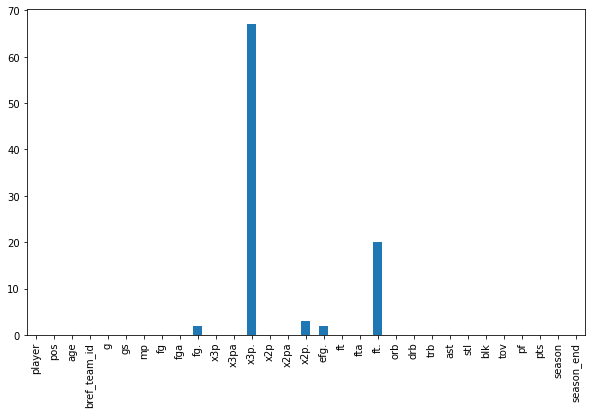

In [8]:
plt.figure(figsize=(10,6))
miss['Miss_data'].plot.bar()

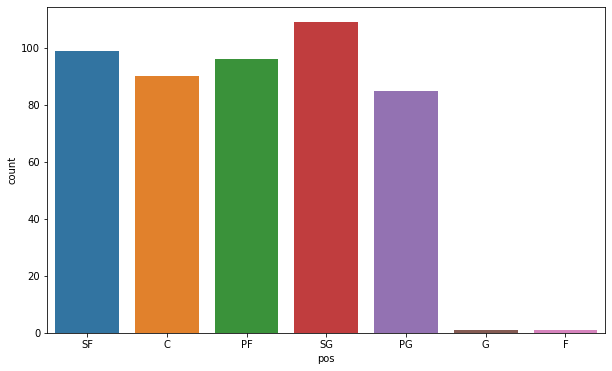

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(df['pos'])

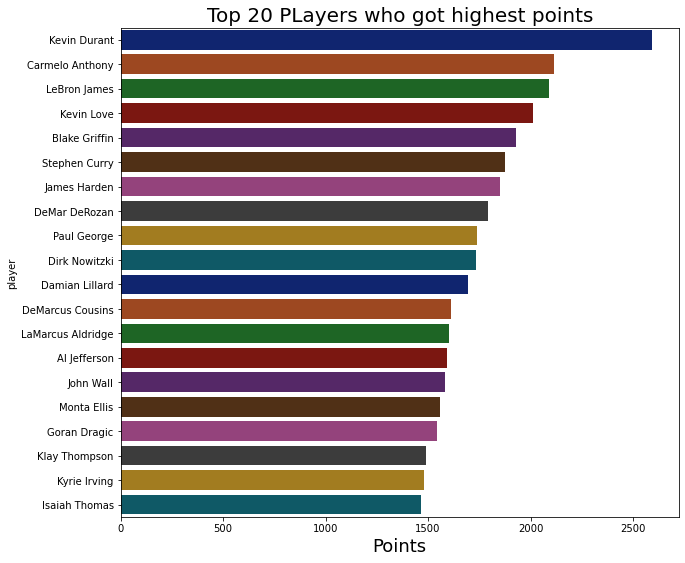

In [10]:
top20=df.groupby('player')['pts'].mean().nlargest(20)
plt.figure(figsize=(10,9))
sns.barplot(x=top20.values,y=top20.index,palette='dark')
plt.title('Top 20 PLayers who got highest points',fontsize=20)
plt.xlabel('Points',fontsize=18)
plt.show()

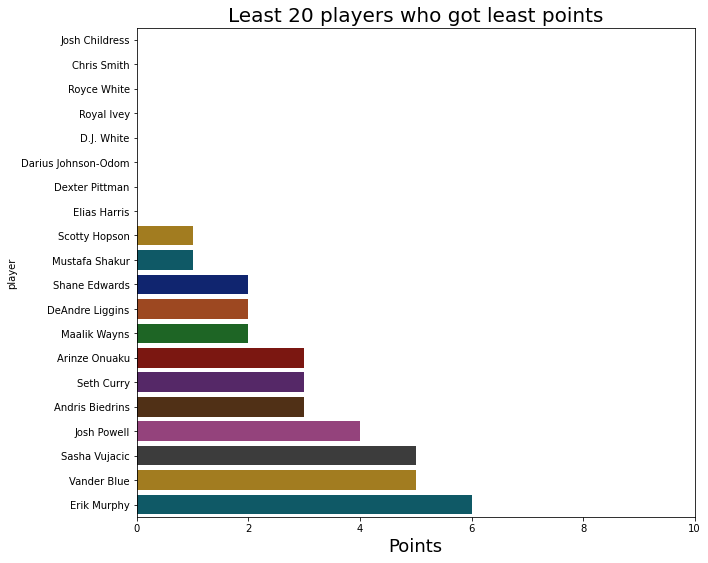

In [11]:
least20=df.groupby('player')['pts'].mean().sort_values(ascending=True).head(20)
plt.figure(figsize=(10,9))
sns.barplot(x=least20.values,y=least20.index,palette='dark')
plt.title('Least 20 players who got least points',fontsize=20)
plt.xlabel('Points',fontsize=18)
plt.xlim(0,10)
plt.show()

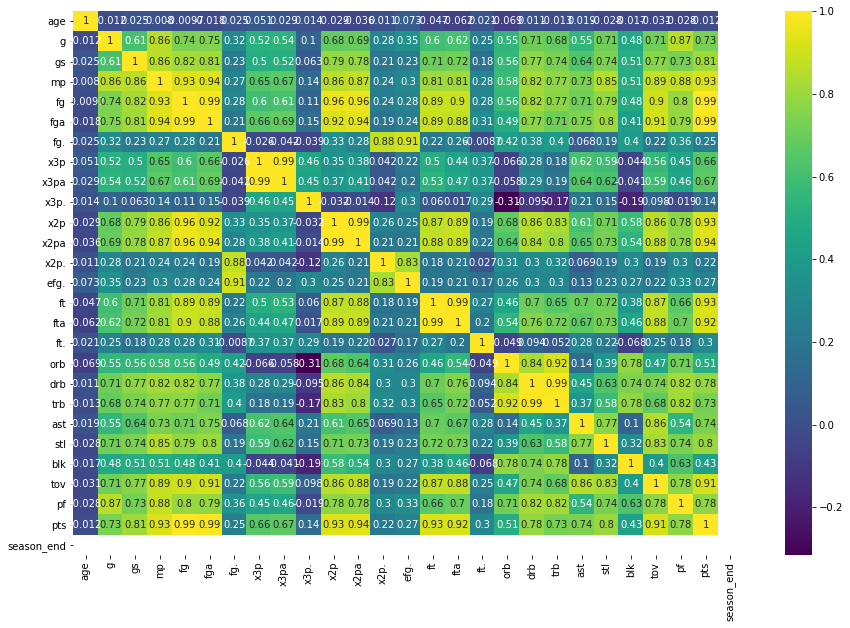

In [12]:
#Check the correlation with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [13]:
#Get the numerical data
num_data=[feature for feature in df.columns if df[feature].dtype != 'O']
num=df[num_data]
num.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013
1,20,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013
2,27,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013


In [14]:
#Get the categorical data 
cat_dat=[i for i in df.columns if df[i].dtype == 'O']
cat=df[cat_dat]
cat.head()

,player,pos,bref_team_id,season
0,Quincy Acy,SF,TOT,2013-2014
1,Steven Adams,C,OKC,2013-2014
2,Jeff Adrien,PF,TOT,2013-2014
3,Arron Afflalo,SG,ORL,2013-2014
4,Alexis Ajinca,C,NOP,2013-2014


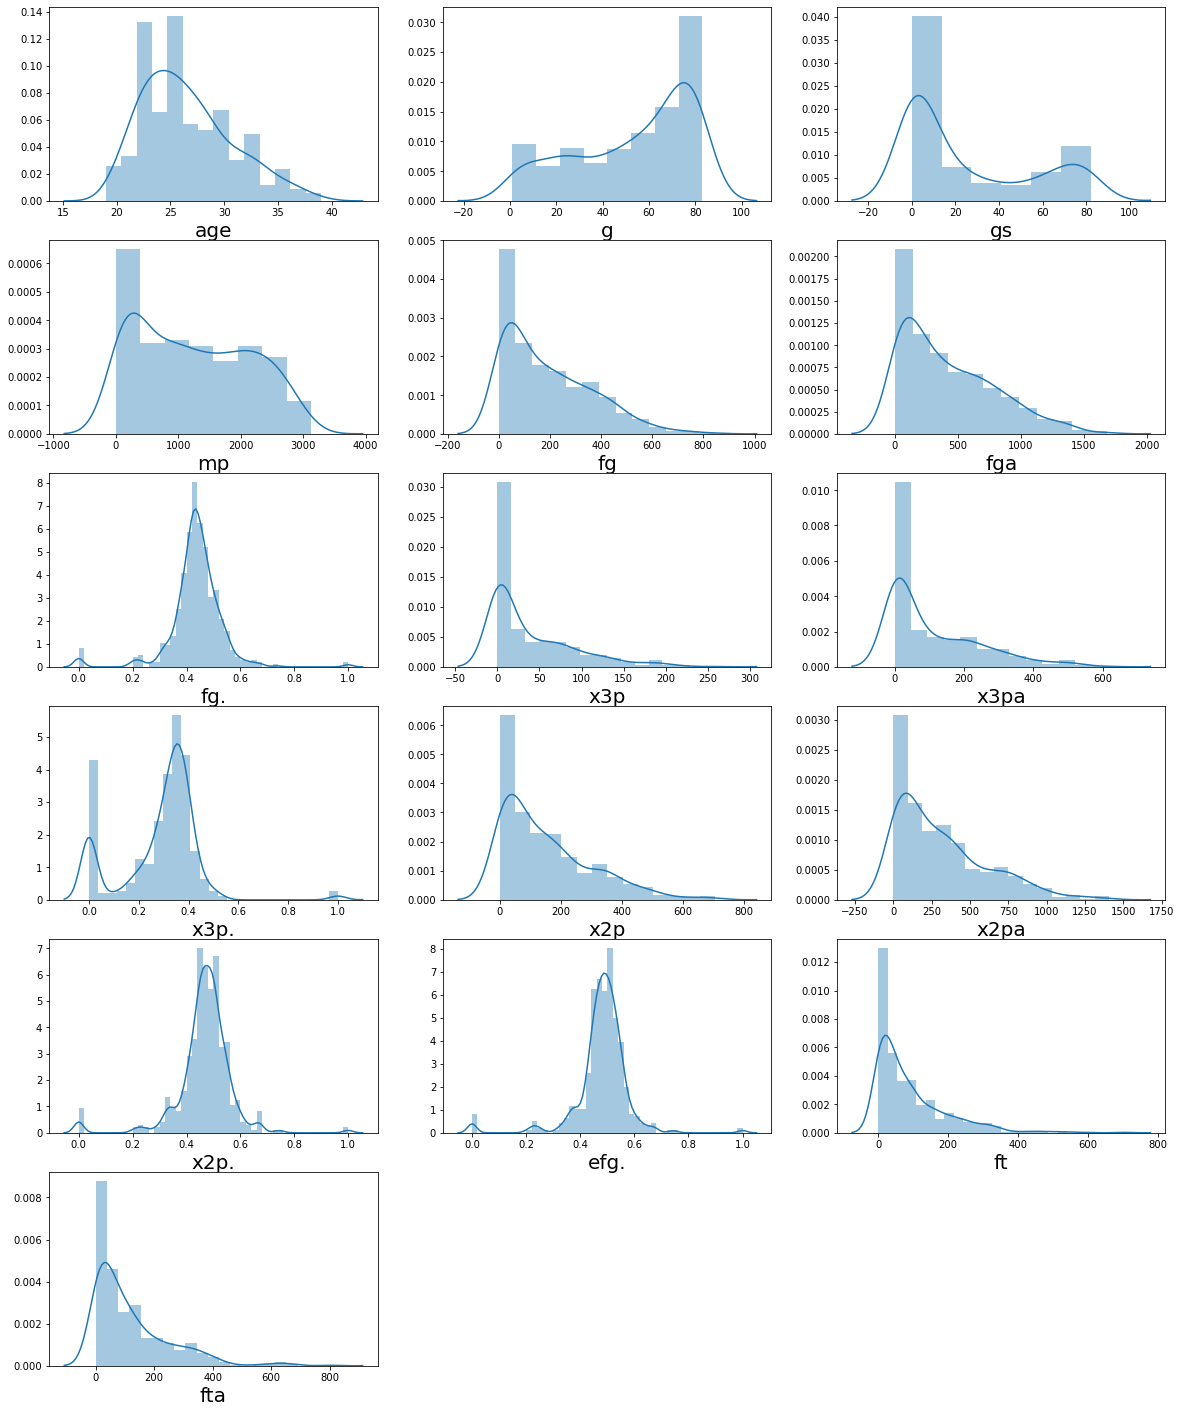

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num:
    if plotnumber<=16 :     # as there are 9 columns in the data
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

The distribution of the each variable is showing a some kind of skewness we need to handle during feature transformation.

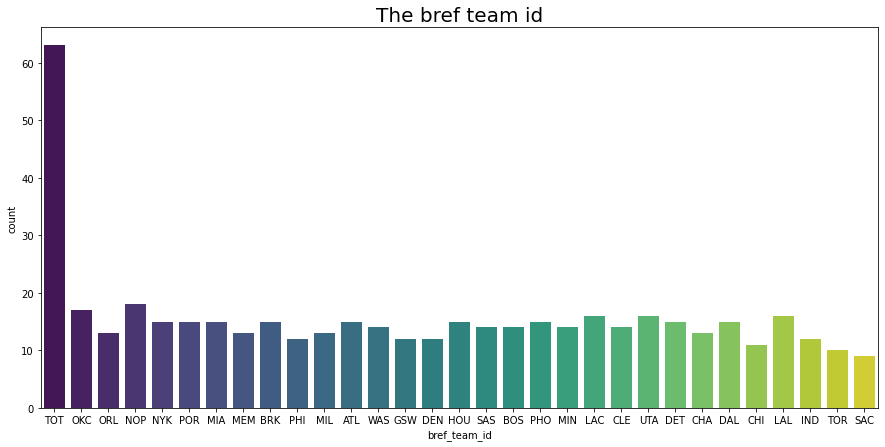

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(df['bref_team_id'],palette='viridis')
plt.title('The bref team id',fontsize=20)
plt.show()

In [17]:
#We don't need the season_end and season as contains single value throught out the variable we need to drop it 
df.drop(columns=['season','season_end'],axis=1,inplace=True)

In [18]:
#Feature engineering
df['fg']=df['fg'].fillna(df['fg'].median())
df['x3p.']=df['x3p.'].fillna(df['x3p.'].mean())
df['x2p.']=df['x2p.'].fillna(df['x2p.'].median())
df['efg.']=df['efg.'].fillna(df['efg.'].median())
df['ft.']=df['ft.'].fillna(df['ft.'].mean())
df['fg.']=df['fg.'].fillna(df['fg.'].median())

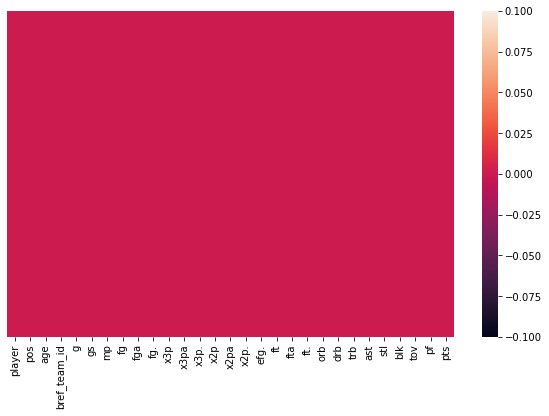

In [19]:
#Again check for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

As we handled all the missing values in the data let's go to further process.

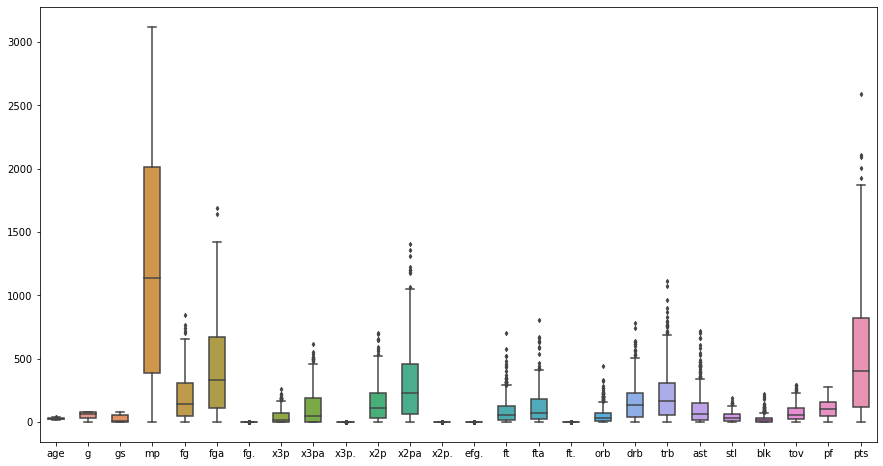

In [20]:
fig,axes=plt.subplots(figsize=(15,8))
sns.boxplot(data=df,width=0.5,ax=axes,fliersize=3)

The plot shows that so many outlier's are present in the data which will be impact our output data. we can be handle by feature scaling.

In [21]:
#Drop the unnesscary columns
df_new=df.drop(labels=['player'],axis=1)

In [22]:
#Convert the string to float
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df_new['pos']=lc.fit_transform(df_new['pos'])
df_new['bref_team_id']=lc.fit_transform(df_new['bref_team_id'])

In [23]:
#Split the data in to x and y
x=df_new.drop('pts',1)
y=df_new['pts']

Some columns having a severe multi colinearity let's drop those variables

In [24]:
#Rename the columns 
x.rename(columns={"x3p.":"x3p","ft.":"ft","bref_team_id":"team_id"},inplace=True)

In [25]:
#Model building with the Knearest neighbor regressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (384, 27)
x_test: (97, 27)
y_train: (384,)
y_test: (97,)


In [26]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [28]:
#predict on the test data
knn_pred=knn.predict(x_test)
knn_pred[:8]

array([ 291.8,  694.2, 1003.4,   70.6,  894.8,  413.6,  238.4,  694.8])

In [29]:
#Get the scores on the training data and test data
print('Training_score:',knn.score(x_train,y_train))
print('Testing_score:',knn.score(x_test,y_test))

Training_score: 0.9706573061104966
Testing_score: 0.9721219436023965


As we can see that our model perform's well both on train data and test data hence there is no overfitting and underfitting problem.

In [30]:
#comapre 
pred=pd.DataFrame({'actual':y_test,'predicted':knn_pred})
pred.head(10)

,actual,predicted
15,436,291.8
124,717,694.2
141,1096,1003.4
263,19,70.6
170,988,894.8
142,416,413.6
399,261,238.4
430,703,694.8
113,83,89.0
21,25,48.4


In [31]:
#Check the error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Mean_absolute_erro: ',mean_absolute_error(y_test,knn_pred))
print('Mean_squared_erro: ',mean_squared_error(y_test,knn_pred))
print('r2_score: ',r2_score(y_test,knn_pred))

Mean_absolute_erro:  50.22474226804122
Mean_squared_erro:  5339.1731958762875
r2_score:  0.9721219436023965


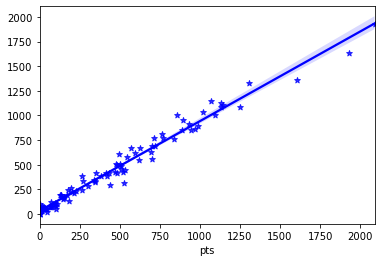

In [32]:
#Dislay the graph 
sns.regplot(y_test,knn_pred,marker='*',color='b')
plt.show()

### Hypertune the model
#### Parameters of KNN Regressor
n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)

In [33]:
knn=KNeighborsRegressor()

param={'n_neighbors':[3,5,6,7,8,9],
      'weights':['uniform','distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size':[18,20,25,27,30,32]}

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

knn_random=RandomizedSearchCV(knn,param_distributions=param,verbose=3,cv=10,n_jobs=-1)

knn_random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.1s finished


RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32],
                                        'n_neighbors': [3, 5, 6, 7, 8, 9],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [34]:
knn_random.best_estimator_

KNeighborsRegressor(leaf_size=32, n_neighbors=8, weights='distance')

In [35]:
knn_random.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'leaf_size': 32, 'algorithm': 'auto'}

In [36]:
knn_model=knn_random.best_estimator_
knn_model.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=32, n_neighbors=8, weights='distance')

In [37]:
knn_model.score(x_train,y_train)

1.0

In [38]:
knn_model.score(x_test,y_test)

0.966928391747883

In [63]:
#Dump the file
import pickle
pickle.dump(knn,open('Knn_model.pickle','wb'))